In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X_test = torch.load('/content/gdrive/MyDrive/X_test.pt')
y_test = torch.load('/content/gdrive/MyDrive/y_test.pt')

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torchvision


In [ ]:
print(y_test[7], y_test[10], y_test[1])

2 1 0


In [ ]:
from torchvision.models import inception_v3
from torch import nn

model = inception_v3(weights='DEFAULT')

input_features = model.fc.in_features
model.fc = nn.Sequential(
        nn.Dropout(p=0.5),
        nn.Linear(input_features, 3),
        nn.Softmax(dim=1)
    )

model.load_state_dict(torch.load('/content/gdrive/MyDrive/Model Checkpoints and metrics for Dataset #2 (New)/InceptionV3_complete_saved.pt', map_location=torch.device('cpu')))
model.eval()

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 85.5MB/s]


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
print(y_test[7], y_test[10], y_test[1])

2 1 0


y_test[7]- Normal

y_test[10]- Pneumonia

y_test[1]- COVID

y_test[44]- Normal

y_test[26]-Pneumonia

y_test[25]- COVID

In [ ]:
normal = torch.from_numpy(X_test[44])
print(normal.max(), normal.min())
normal = torch.unsqueeze(normal,dim=0).permute(0,3,1,2)
print(normal.shape)

tensor(0.9529) tensor(0.)
torch.Size([1, 3, 224, 224])


In [ ]:
outputs = model(normal)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[5.3736e-04, 4.3152e-06, 9.9946e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2])


In [ ]:
pneumonia = torch.from_numpy(X_test[26])
print(pneumonia.max(), pneumonia.min())
pneumonia = torch.unsqueeze(pneumonia,dim=0).permute(0,3,1,2)
print(pneumonia.shape)

tensor(0.9020) tensor(0.)
torch.Size([1, 3, 224, 224])


In [ ]:
outputs = model(pneumonia)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[2.2264e-01, 7.7712e-01, 2.4039e-04]], grad_fn=<SoftmaxBackward0>)
tensor([1])


In [ ]:
covid = torch.from_numpy(X_test[25])
print(covid.max(), covid.min())
covid = torch.unsqueeze(covid,dim=0).permute(0,3,1,2)
print(covid.shape)

tensor(0.8078) tensor(0.)
torch.Size([1, 3, 224, 224])


In [ ]:
outputs = model(covid)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[9.9999e-01, 6.3560e-06, 1.8119e-06]], grad_fn=<SoftmaxBackward0>)
tensor([0])


In [ ]:
print(y_test[37], y_test[26], y_test[25])

2 1 0


In [ ]:
!pip install captum
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install captum
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

# **Saliency and GradCAM of first batch of images**

In [ ]:
import os
import cv2

In [ ]:
normal_1 = X_test[44]
normal_1 = cv2.resize(normal_1,(299, 299), interpolation=cv2.INTER_LINEAR)
normal_1 = torch.from_numpy(normal_1)
normal_1 = normal_1.type(torch.FloatTensor)
normal_1 = torch.unsqueeze(normal_1, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_1, normal_1.dtype)

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5792, 0.6471, 0.6593],
          [0.0000, 0.0000, 0.0000,  ..., 0.5621, 0.6382, 0.6505],
          [0.0000, 0.0000, 0.0000,  ..., 0.5475, 0.6309, 0.6431]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5792, 0.6471, 0.6593],
          [0.0000, 0.0000, 0.0000,  ..., 0.5621, 0.6382, 0.6505],
          [0.0000, 0.0000, 0.0000,  ..., 0.5475, 0.6309, 0.6431]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [ ]:
import captum
from captum.attr import Saliency

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(normal_1, target=2)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [ ]:
print(attributions)

tensor([[[[1.2872e-08, 3.5312e-08, 4.2447e-08,  ..., 3.2312e-08,
           2.1417e-08, 1.7765e-08],
          [4.0489e-08, 5.9706e-08, 8.3139e-09,  ..., 6.3609e-08,
           3.3741e-08, 2.9483e-08],
          [1.1840e-08, 7.6654e-08, 5.1202e-08,  ..., 1.8647e-08,
           1.7969e-07, 9.0634e-08],
          ...,
          [2.7461e-08, 5.2397e-08, 2.7257e-07,  ..., 7.2192e-10,
           5.0276e-08, 3.0224e-08],
          [3.3093e-08, 6.4145e-08, 2.0094e-07,  ..., 6.8016e-08,
           3.4759e-08, 1.9477e-08],
          [1.4880e-08, 3.8645e-08, 9.9286e-08,  ..., 5.4259e-08,
           2.0736e-08, 1.3330e-08]],

         [[3.2448e-08, 5.1555e-08, 1.4486e-08,  ..., 4.8383e-09,
           1.2153e-08, 9.5634e-09],
          [6.5693e-08, 6.4708e-08, 5.3035e-08,  ..., 4.6959e-09,
           2.2459e-08, 1.4601e-08],
          [3.3605e-08, 5.8640e-08, 1.2919e-07,  ..., 1.0852e-07,
           5.9366e-08, 4.4684e-08],
          ...,
          [2.1930e-08, 2.2755e-08, 1.8982e-08,  ..., 1.5266

In [ ]:
import captum
normal_1 = torch.squeeze(normal_1, dim=0)
normal_1 = normal_1.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_1.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
normal_1 = normal_1.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

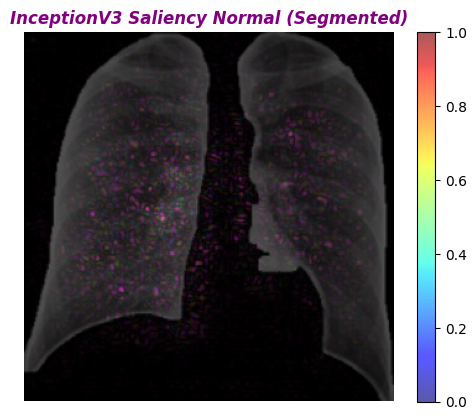

In [ ]:
plt.imshow(normal_1)
plt.imshow(attributions, cmap='jet', alpha=0.65)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Normal (Segmented)", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
covid_1 = X_test[25]
covid_1 = cv2.resize(covid_1, (299,299), interpolation=cv2.INTER_LINEAR)
covid_1 = torch.from_numpy(covid_1)
covid_1 = covid_1.type(torch.FloatTensor)
covid_1 = torch.unsqueeze(covid_1, dim=0).permute(0,3,1,2)

In [ ]:
print(covid_1.dtype, covid_1.shape)

torch.float32 torch.Size([1, 3, 299, 299])


In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(covid_1, target=0)

In [ ]:
print(attributions)

tensor([[[[2.2079e-03, 3.2007e-03, 5.4422e-03,  ..., 5.8393e-03,
           1.5447e-03, 6.5971e-04],
          [1.7608e-03, 1.1071e-03, 4.5255e-03,  ..., 1.1791e-02,
           3.6943e-03, 1.1759e-03],
          [6.6548e-03, 1.0776e-02, 1.9948e-02,  ..., 1.7801e-02,
           7.3395e-03, 4.7986e-03],
          ...,
          [3.5248e-04, 8.2087e-04, 6.7516e-04,  ..., 4.0068e-03,
           1.4518e-03, 1.1182e-03],
          [5.7767e-04, 1.2577e-03, 1.5484e-03,  ..., 3.3712e-05,
           1.6768e-04, 9.0445e-05],
          [1.7329e-04, 6.6822e-04, 7.3051e-04,  ..., 2.5299e-04,
           2.8350e-04, 3.0192e-04]],

         [[2.7926e-04, 7.6637e-04, 4.4026e-03,  ..., 1.9554e-03,
           1.0156e-03, 3.1279e-04],
          [7.1519e-04, 1.8724e-03, 7.8179e-03,  ..., 3.8456e-03,
           1.6718e-03, 1.5966e-03],
          [1.4328e-03, 2.1284e-03, 1.5474e-02,  ..., 1.5300e-03,
           1.1034e-04, 2.7014e-04],
          ...,
          [3.3386e-04, 6.9374e-04, 1.0666e-03,  ..., 1.2176

In [ ]:
import captum
covid_1 = torch.squeeze(covid_1, dim=0)
covid_1 = covid_1.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_1.shape, attributions.shape)

(299, 299, 3) torch.Size([299, 299, 3])


In [ ]:
attributions = attributions.numpy()
covid_1 = covid_1.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


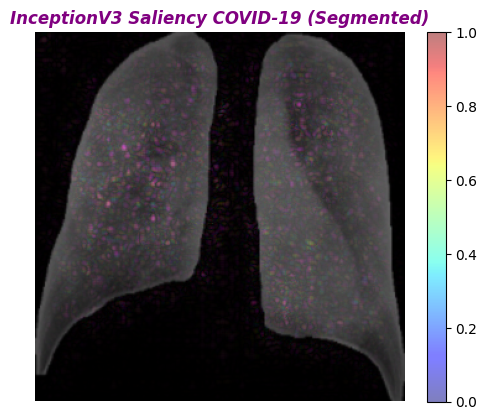

In [ ]:
plt.imshow(covid_1)
plt.imshow(attributions, cmap='jet', alpha=0.5)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency COVID-19 (Segmented)", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
pneumonia_1 = X_test[26]
pneumonia_1 = cv2.resize(pneumonia_1, (299,299), interpolation=cv2.INTER_LINEAR)
pneumonia_1 = torch.from_numpy(pneumonia_1)
pneumonia_1 = pneumonia_1.type(torch.FloatTensor)
pneumonia_1 = torch.unsqueeze(pneumonia_1, dim=0).permute(0,3,1,2)

In [ ]:
print(pneumonia_1.dtype, pneumonia_1.shape)

torch.float32 torch.Size([1, 3, 299, 299])


In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(pneumonia_1, target=1)

In [ ]:
print(attributions)

tensor([[[[5.2028e-06, 3.8668e-06, 3.3874e-05,  ..., 3.3972e-05,
           1.2206e-05, 1.0600e-05],
          [2.2053e-06, 1.4163e-05, 6.8124e-05,  ..., 7.5748e-05,
           2.0511e-05, 1.5339e-05],
          [1.5173e-05, 1.2552e-05, 9.0653e-06,  ..., 1.4137e-04,
           3.4756e-05, 1.9776e-05],
          ...,
          [1.3810e-05, 3.1066e-05, 2.2052e-05,  ..., 1.8522e-04,
           6.7842e-05, 5.8719e-05],
          [1.0920e-05, 1.6554e-05, 3.2915e-06,  ..., 6.3153e-06,
           3.5640e-07, 3.7150e-06],
          [8.3373e-06, 9.7197e-06, 6.6672e-06,  ..., 3.8169e-06,
           9.3791e-08, 2.5097e-06]],

         [[1.0316e-05, 1.7668e-05, 1.4344e-06,  ..., 1.4936e-05,
           4.8931e-06, 3.9761e-06],
          [2.9223e-05, 2.5813e-05, 4.9945e-06,  ..., 1.0399e-05,
           5.0310e-06, 5.8197e-06],
          [1.2873e-05, 1.3414e-05, 7.9612e-05,  ..., 2.6827e-05,
           1.2648e-05, 5.6623e-06],
          ...,
          [3.2728e-05, 4.7456e-05, 6.9682e-05,  ..., 1.0916

In [ ]:
import captum
pneumonia_1 = torch.squeeze(pneumonia_1, dim=0)
pneumonia_1 = pneumonia_1.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(pneumonia_1.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([299, 299, 3])


In [ ]:
attributions = attributions.numpy()
pneumonia_1 = pneumonia_1.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


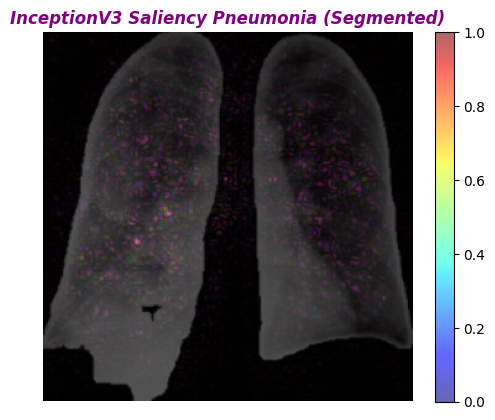

In [ ]:
plt.imshow(pneumonia_1)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Pneumonia (Segmented)", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  U

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2

In [ ]:
import torch
import torchvision

In [ ]:
normal_2 = X_test[44]
normal_2 = cv2.resize(normal_2, (299,299), interpolation=cv2.INTER_LINEAR)
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor)
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_2)

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5792, 0.6471, 0.6593],
          [0.0000, 0.0000, 0.0000,  ..., 0.5621, 0.6382, 0.6505],
          [0.0000, 0.0000, 0.0000,  ..., 0.5475, 0.6309, 0.6431]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5792, 0.6471, 0.6593],
          [0.0000, 0.0000, 0.0000,  ..., 0.5621, 0.6382, 0.6505],
          [0.0000, 0.0000, 0.0000,  ..., 0.5475, 0.6309, 0.6431]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model.Mixed_7c.branch_pool]

cam = GradCAM(model=model, target_layers=target_layer)

cam_map = cam(input_tensor=normal_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
import numpy as np

In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (299,299,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 299, 299)
(299, 299, 1)


In [ ]:
image_numpy = torch.squeeze(normal_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

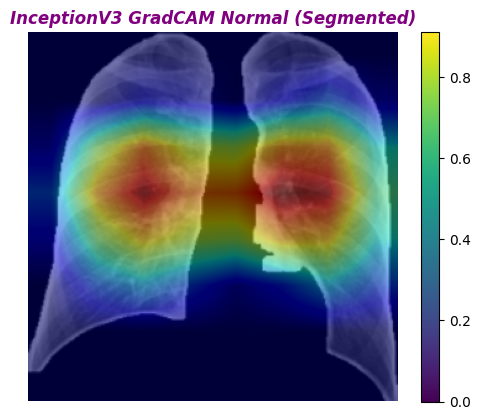

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.45, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("InceptionV3 GradCAM Normal (Segmented)", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
covid_2 = X_test[25]
covid_2 = cv2.resize(covid_2, (299,299), interpolation=cv2.INTER_LINEAR)
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor)
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model.Mixed_7c.branch_pool]

cam = GradCAM(model=model, target_layers=target_layer)

cam_map = cam(input_tensor=covid_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (299,299,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 299, 299)
(299, 299, 1)


In [ ]:
image_numpy = torch.squeeze(covid_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

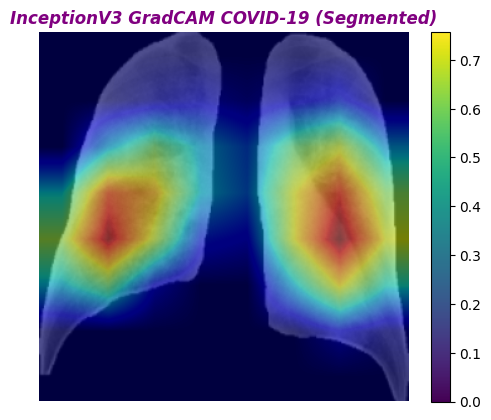

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.5, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("InceptionV3 GradCAM COVID-19 (Segmented)", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
pneumonia_2 = X_test[26]
pneumonia_2 = cv2.resize(pneumonia_2, (299,299), interpolation=cv2.INTER_LINEAR)
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor)
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model.Mixed_7c.branch_pool]

cam = GradCAM(model=model, target_layers=target_layer)

cam_map = cam(input_tensor=pneumonia_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (299,299,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 299, 299)
(299, 299, 1)


In [ ]:
image_numpy = torch.squeeze(pneumonia_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

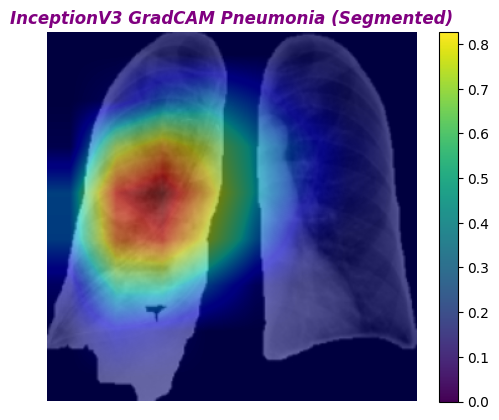

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.5, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("InceptionV3 GradCAM Pneumonia (Segmented)", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


# **Saliency and GradCAM of second batch of images**

In [ ]:
import cv2

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_2)

tensor([[[[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0

In [ ]:
import captum
from captum.attr import Saliency

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(normal_2, target=2)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [ ]:
print(attributions)

tensor([[[[4.6304e-07, 1.0272e-06, 3.0065e-06,  ..., 8.2941e-06,
           2.1671e-06, 5.8515e-07],
          [8.0614e-07, 1.7259e-06, 5.2828e-06,  ..., 8.7684e-06,
           6.5331e-06, 3.3518e-06],
          [2.9072e-06, 6.9571e-06, 9.6182e-06,  ..., 1.4105e-05,
           7.1038e-06, 6.3103e-06],
          ...,
          [3.5472e-06, 9.9956e-06, 4.4881e-05,  ..., 1.4351e-06,
           3.2217e-07, 2.2667e-07],
          [3.5232e-06, 7.5360e-06, 3.1788e-05,  ..., 3.7972e-07,
           1.8647e-07, 2.7264e-07],
          [2.4383e-06, 4.7424e-06, 1.6745e-05,  ..., 1.8916e-07,
           1.8350e-07, 3.2081e-07]],

         [[2.6509e-07, 6.0746e-07, 2.9562e-06,  ..., 5.4907e-07,
           9.8990e-07, 2.4299e-07],
          [6.9918e-07, 1.3232e-06, 3.7562e-06,  ..., 2.4055e-06,
           4.1874e-06, 1.5828e-06],
          [8.6345e-07, 7.9862e-07, 1.1090e-05,  ..., 8.6990e-06,
           2.2613e-07, 5.4537e-06],
          ...,
          [2.9520e-06, 1.5623e-05, 2.3480e-05,  ..., 1.6888

In [ ]:
import captum
normal_2 = torch.squeeze(normal_2, dim=0)
normal_2 = normal_2.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_2.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
normal_2 = normal_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

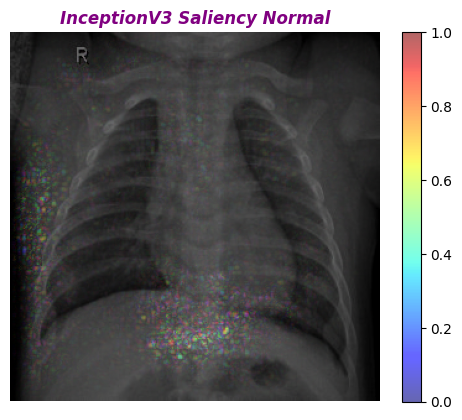

In [ ]:
plt.imshow(normal_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Normal", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(covid_2, target=0)

In [ ]:
print(attributions)

tensor([[[[4.9730e-08, 2.8874e-08, 6.1975e-08,  ..., 1.9406e-08,
           2.7372e-08, 1.0237e-09],
          [7.1539e-09, 7.4112e-08, 1.1577e-07,  ..., 5.7505e-08,
           4.4614e-08, 2.0725e-08],
          [3.9546e-08, 2.2777e-07, 1.3450e-07,  ..., 2.3962e-08,
           1.3753e-07, 9.3664e-08],
          ...,
          [2.8155e-08, 4.9700e-08, 3.5232e-08,  ..., 1.0994e-07,
           1.4011e-07, 1.1862e-07],
          [2.7332e-08, 4.6548e-08, 2.2200e-08,  ..., 1.0024e-07,
           1.2721e-07, 8.8113e-08],
          [1.7020e-08, 2.4939e-08, 1.3099e-08,  ..., 8.2966e-08,
           8.6067e-08, 7.8687e-08]],

         [[4.0716e-08, 9.6421e-08, 2.0762e-07,  ..., 2.2976e-08,
           2.6084e-08, 1.3857e-08],
          [5.9119e-08, 1.6036e-07, 3.7073e-07,  ..., 1.8371e-08,
           4.7577e-08, 5.5854e-09],
          [3.0182e-07, 4.3439e-07, 6.0214e-07,  ..., 6.6768e-09,
           1.0010e-08, 4.1394e-08],
          ...,
          [2.1620e-08, 1.3946e-08, 2.2620e-08,  ..., 2.4312

In [ ]:
import captum
covid_2 = torch.squeeze(covid_2, dim=0)
covid_2 = covid_2.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(covid_2.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
covid_2 = covid_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


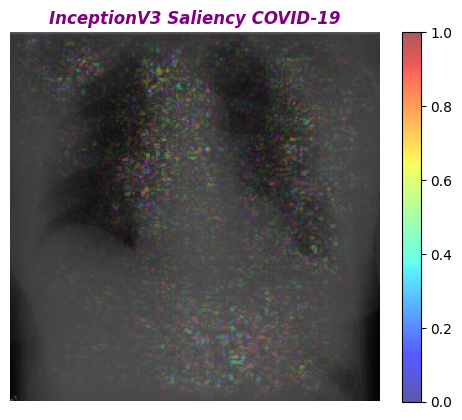

In [ ]:
plt.imshow(covid_2)
plt.imshow(attributions, cmap='jet', alpha=0.65)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency COVID-19", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(pneumonia_2, target=1)

In [ ]:
print(attributions)

tensor([[[[5.7471e-17, 2.4845e-16, 1.9328e-16,  ..., 6.5282e-16,
           1.6646e-15, 1.3186e-15],
          [3.3811e-16, 3.8843e-16, 1.4379e-15,  ..., 3.1760e-15,
           3.6820e-15, 1.7706e-15],
          [2.0256e-16, 4.1593e-16, 5.7798e-16,  ..., 2.9669e-15,
           9.4002e-15, 5.3720e-15],
          ...,
          [2.1812e-16, 3.9398e-16, 7.3890e-16,  ..., 1.1968e-16,
           3.5145e-17, 4.6243e-17],
          [6.6535e-18, 7.3841e-17, 4.0997e-16,  ..., 4.0464e-17,
           3.3987e-17, 7.9140e-18],
          [8.3586e-17, 3.5364e-17, 2.7112e-16,  ..., 1.9117e-17,
           1.7966e-17, 7.0381e-18]],

         [[1.5517e-16, 7.6082e-16, 1.2851e-15,  ..., 1.0773e-17,
           1.5634e-15, 1.0995e-15],
          [5.8794e-16, 1.1139e-15, 1.8153e-15,  ..., 1.2260e-15,
           1.6486e-15, 2.0760e-15],
          [1.1669e-16, 1.1962e-15, 2.1841e-15,  ..., 4.3659e-16,
           7.8987e-16, 1.9352e-15],
          ...,
          [1.7544e-16, 4.5399e-17, 1.4820e-16,  ..., 9.4734

In [ ]:
import captum
pneumonia_2 = torch.squeeze(pneumonia_2, dim=0)
pneumonia_2 = pneumonia_2.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(pneumonia_2.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
pneumonia_2 = pneumonia_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

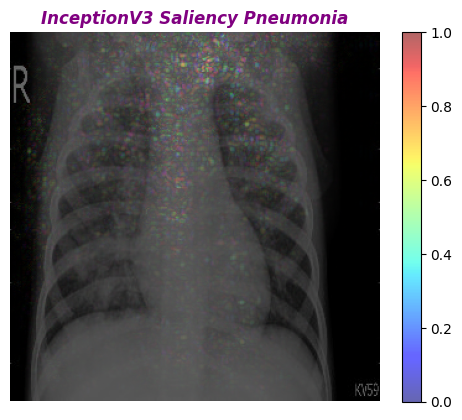

In [ ]:
plt.imshow(pneumonia_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Pneumonia", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()